In [1]:
import cc3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

from skimage import draw, measure
from shapely.geometry import Polygon

from typing import Dict, List, Tuple

from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import os

# Dummy data section:

## Create some dummy data to develop & test first ideas

In [ ]:
plane_0 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

plane_1 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

plane_2 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

plane_3 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
                    [0, 1, 1, 0, 0, 0, 0, 0, 1, 0]])

plane_4 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])



In [ ]:
instseg_plane_0 = np.array([[1, 1, 2, 2, 0, 0, 0, 0, 0, 0], 
                            [1, 1, 2, 2, 0, 0, 0, 0, 0, 0],
                            [1, 1, 2, 2, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

instseg_plane_1 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

instseg_plane_2 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
                            [0, 0, 0, 0, 0, 0, 0, 3, 3, 3],
                            [0, 0, 0, 0, 0, 0, 0, 0, 3, 0]])

instseg_plane_3 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
                            [0, 3, 3, 0, 0, 0, 0, 2, 2, 2],
                            [0, 3, 3, 0, 0, 0, 0, 0, 2, 0]])

instseg_plane_4 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                            [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])



In [ ]:
instseg_plane_0 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                            [1, 1, 1, 2, 2, 0, 0, 0, 0, 0],
                            [1, 1, 2, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 2, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

instseg_plane_1 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                            [1, 1, 1, 2, 2, 2, 0, 0, 0, 0],
                            [1, 1, 1, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 3, 2, 3, 0, 0, 0, 0],
                            [0, 0, 0, 3, 3, 3, 0, 0, 0, 0],
                            [0, 0, 0, 3, 3, 3, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

instseg_plane_2 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
                            [0, 0, 0, 0, 0, 0, 0, 3, 3, 3],
                            [0, 0, 0, 0, 0, 0, 0, 0, 3, 0]])

instseg_plane_3 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
                            [0, 3, 3, 0, 0, 0, 0, 2, 2, 2],
                            [0, 3, 3, 0, 0, 0, 0, 0, 2, 0]])

instseg_plane_4 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                            [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])



In [ ]:
zstack = np.array([plane_0, plane_1, plane_2, plane_3, plane_4])
instseg_zstack = np.array([instseg_plane_0, instseg_plane_1, instseg_plane_2, instseg_plane_3, instseg_plane_4])
labels_out_zstack, N_cc_zstack = cc3d.connected_components(zstack, return_N = True)
labels_out_instseg_zstack, N_cc_instseg_zstack = cc3d.connected_components(instseg_zstack, return_N = True)


In [ ]:
N_cc_instseg_zstack

In [ ]:
instseg_zstack

# Testing on real instance segmentation data

## Basic functions

In [2]:
def load_zstack_as_array_from_single_planes(path, file_id, minx=None, maxx=None, miny=None, maxy=None):
    types = list(set([type(minx), type(maxx), type(miny), type(maxy)]))    
    if any([minx, maxx, miny, maxy]):
        if (len(types) == 1) & (types[0] == int):
            cropping = True
        else:
            raise TypeError("'minx', 'maxx', 'miny', and 'maxy' all have to be integers - or None if no cropping has to be done")
    else:
        cropping = False
    filenames = [filename for filename in os.listdir(path) if filename.startswith(file_id)]
    cropped_zstack = list()
    for single_plane_filename in filenames:
        tmp_image = imread(path + single_plane_filename)
        if cropping:
            tmp_image = tmp_image[minx:maxx, miny:maxy]
        cropped_zstack.append(tmp_image.copy())
        del tmp_image
    return np.asarray(cropped_zstack)  

In [3]:
def unpad_x_y_dims_in_2d_array(padded_2d_array, pad_width):
    return padded_2d_array[pad_width:padded_2d_array.shape[0]-pad_width, pad_width:padded_2d_array.shape[1]-pad_width]
    
    
def unpad_x_y_dims_in_3d_array(padded_3d_array, pad_width):
    return padded_3d_array[:, pad_width:padded_3d_array.shape[1]-pad_width, pad_width:padded_3d_array.shape[2]-pad_width]

In [4]:
def get_polygon_from_instance_segmentation(single_plane: np.ndarray, label_id: int) -> Polygon:
    x_dim, y_dim = single_plane.shape
    tmp_array = np.zeros((x_dim, y_dim), dtype='uint8')
    tmp_array[np.where(single_plane == label_id)] = 1
    tmp_contours = measure.find_contours(tmp_array, level = 0)[0]
    return Polygon(tmp_contours)

## Functions to compute ROI matching results

In [5]:
def roi_matching(original_roi: Polygon, roi_to_compare: Polygon, label_id_roi_to_compare: int, results: Dict, plane_indicator: str) -> Dict:

        iou = original_roi.intersection(roi_to_compare).area / original_roi.union(roi_to_compare).area
        proportion = original_roi.intersection(roi_to_compare).area / original_roi.area

        if original_roi.within(roi_to_compare) or roi_to_compare.within(original_roi): within = True
        else: within = False

        results[f'matching_ids_{plane_indicator}_plane'].append(label_id_roi_to_compare)
        results[f'full_overlap_{plane_indicator}_plane'].append(within)
        results[f'overlapping_area_{plane_indicator}_plane'].append(proportion)
        results[f'IoUs_{plane_indicator}_plane'].append(iou)
        
        return results
    

In [6]:
def get_plane_to_plane_roi_matching_results(zstack, verbose=True) -> Dict:
    z_dim, x_dim, y_dim = zstack.shape
    results = dict()
    
    for plane_idx in range(z_dim):
        if verbose:
            print(f'starting with plane {plane_idx}')
        results[plane_idx] = dict()

        if plane_idx == 0:
            previous_plane_info = (None, 'previous')
            next_plane_info = (plane_idx + 1, 'next')
        elif plane_idx == z_dim - 1:
            previous_plane_info = (plane_idx - 1, 'previous')
            next_plane_info = (None, 'next')
        else:
            previous_plane_info = (plane_idx - 1, 'previous')
            next_plane_info = (plane_idx + 1, 'next')

        plane = zstack[plane_idx]
        unique_label_ids = list(np.unique(plane))
        if 0 in unique_label_ids:
            unique_label_ids.remove(0)
        elif 0.0 in unique_label_ids:
            unique_label_ids.remove(0.0)

        for label_id in unique_label_ids:
            roi = get_polygon_from_instance_segmentation(single_plane = zstack[plane_idx], label_id = label_id)
            roi_area = roi.area
            
            results[plane_idx][label_id] = {'final_label_id_assigned': False,
                                            'final_label_id': None,
                                            'area': roi_area,
                                            'matching_ids_previous_plane': list(),
                                            'full_overlap_previous_plane': list(),
                                            'overlapping_area_previous_plane': list(),
                                            'IoUs_previous_plane': list(),
                                            'matching_ids_next_plane': list(),
                                            'full_overlap_next_plane': list(),
                                            'overlapping_area_next_plane': list(),
                                            'IoUs_next_plane': list(),
                                            'best_match_previous_plane': None,
                                            'overlapping_area_best_match_previous_plane': None,
                                            'IoU_best_match_previous_plane': None,
                                            'best_match_next_plane': None,
                                            'overlapping_area_best_match_next_plane': None,
                                            'IoU_best_match_next_plane': None}
            
            for plane_to_compare_info in [previous_plane_info, next_plane_info]:
                if plane_to_compare_info[0] != None:
                    labels_of_pixels_in_plane_to_compare = None # Reset results - still required??
                    plane_to_compare_idx, plane_indicator = plane_to_compare_info[0], plane_to_compare_info[1]
                    labels_of_pixels_in_plane_to_compare = zstack[plane_to_compare_idx][np.where(plane == label_id)]
                    labels_of_pixels_in_plane_to_compare = list(np.unique(labels_of_pixels_in_plane_to_compare))
                    if 0 in labels_of_pixels_in_plane_to_compare:
                        labels_of_pixels_in_plane_to_compare.remove(0)
                    elif 0.0 in labels_of_pixels_in_plane_to_compare:
                        labels_of_pixels_in_plane_to_compare.remove(0.0)

                    for label_id_in_plane_to_compare in labels_of_pixels_in_plane_to_compare:
                        roi_to_compare = get_polygon_from_instance_segmentation(single_plane = zstack[plane_to_compare_idx], label_id = label_id_in_plane_to_compare)
                        results[plane_idx][label_id] = roi_matching(original_roi = roi, 
                                                                    roi_to_compare = roi_to_compare, 
                                                                    label_id_roi_to_compare =  label_id_in_plane_to_compare, 
                                                                    results = results[plane_idx][label_id], 
                                                                    plane_indicator = plane_indicator)
    return results

In [7]:
def find_best_matches(results: Dict) -> Dict:
    
    for plane_indicator in ['previous', 'next']:
        if len(results[f'matching_ids_{plane_indicator}_plane']) > 0:
            max_iou = max(results[f'IoUs_{plane_indicator}_plane'])
            if max_iou >= 0.5: # Does this really make sense here? IoU could also be < 0.5 and within == False, but only because of some pixel? Max reciprocal overlap??
                index = results[f'IoUs_{plane_indicator}_plane'].index(max_iou)
            elif any(results[f'full_overlap_{plane_indicator}_plane']):
                index = results[f'full_overlap_{plane_indicator}_plane'].index(True)
            else:
                index = None
            
            if type(index) == int:
                best_matching_id = results[f'matching_ids_{plane_indicator}_plane'][index]
                iou = max_iou
                overlap = results[f'overlapping_area_{plane_indicator}_plane'][index]
            else: 
                best_matching_id, iou, overlap = None, None, None
                
            results[f'best_match_{plane_indicator}_plane'] = best_matching_id
            results[f'overlapping_area_best_match_{plane_indicator}_plane'] = overlap
            results[f'IoU_best_match_{plane_indicator}_plane'] = iou
    
    return results

## Functions to assign final label ids

In [8]:
def trace_matches(matching_results: Dict, final_ids_assignment: Dict, current_final_id: int) -> Tuple[Dict, Dict, bool]:
    current_plane_idx = final_ids_assignment[current_final_id]['plane_index'][-1]
    current_plane_label_id = final_ids_assignment[current_final_id]['original_label_id'][-1]
    best_match_next_plane = matching_results[current_plane_idx][current_plane_label_id]['best_match_next_plane']
    next_plane_idx = current_plane_idx + 1

    if matching_results[next_plane_idx][best_match_next_plane]['final_label_id_assigned']:
        raise ValueError(f'ROI with ID {best_match_next_plane} in plane {next_plane_idx} was already assigned! :o')
    else:
        if matching_results[next_plane_idx][best_match_next_plane]['best_match_previous_plane'] != current_plane_label_id:
            raise ValueError(f'ROI with ID {best_match_next_plane} in plane {next_plane_idx} does not share best matching with previous plane!')
        else:
            matching_results[next_plane_idx][best_match_next_plane]['final_label_id_assigned'] = True
            matching_results[next_plane_idx][best_match_next_plane]['final_label_id'] = current_final_id
            final_ids_assignment[current_final_id]['plane_index'].append(next_plane_idx)
            final_ids_assignment[current_final_id]['original_label_id'].append(best_match_next_plane)

            if matching_results[next_plane_idx][best_match_next_plane]['best_match_next_plane'] != None:
                keep_tracing = True
                
            else:
                keep_tracing = False

    return matching_results, final_ids_assignment, keep_tracing

In [9]:
def get_final_id_assignments(results: Dict, lowest_final_label_id = 2000) -> Tuple[Dict, Dict]:
    final_ids = dict()
    keep_going = True
    final_label_id = lowest_final_label_id
    
    for plane_idx in results.keys():
        for label_id in results[plane_idx].keys():
            if results[plane_idx][label_id]['final_label_id_assigned']:
                continue
            else:
                final_ids[final_label_id] = {'plane_index': list(),
                                             'original_label_id': list()}

                results[plane_idx][label_id]['final_label_id_assigned'] = True
                results[plane_idx][label_id]['final_label_id'] = final_label_id
                final_ids[final_label_id]['plane_index'].append(plane_idx)
                final_ids[final_label_id]['original_label_id'].append(label_id)
                
                # Now start tracing:
                if results[plane_idx][label_id]['best_match_next_plane'] != None:
                    keep_tracing = True
                    while keep_tracing:
                        results, final_ids, keep_tracing = trace_matches(matching_results = results, 
                                                                         final_ids_assignment = final_ids, 
                                                                         current_final_id = final_label_id)
                final_label_id += 1
    return final_ids, results

In [10]:
def set_new_label_ids(zstack_with_old_label_ids: np.ndarray, new_ids_assignment: Dict) -> np.ndarray:
    zstack_with_new_label_ids = zstack_with_old_label_ids.copy()
    for new_label_id in new_ids_assignment.keys():
        for idx in range(len(new_ids_assignment[new_label_id]['plane_index'])):
            plane_index = new_ids_assignment[new_label_id]['plane_index'][idx]
            old_label_id = new_ids_assignment[new_label_id]['original_label_id'][idx]
            zstack_with_new_label_ids[plane_index][np.where(zstack_with_new_label_ids[plane_index] == old_label_id)] = new_label_id
    return zstack_with_new_label_ids

## Functions that allow inspection of the cell reconstruction results:

In [11]:
def get_rois_with_multiple_matches(results: Dict) -> List:

    multi_matches_traceback = list()

    for plane_idx in results.keys():
        for label_id in results[plane_idx].keys():
            condition_a = len(results[plane_idx][label_id]['matching_ids_next_plane']) > 1
            condition_b = len(results[plane_idx][label_id]['matching_ids_previous_plane']) > 1
            if condition_a or condition_b:
                multi_matches_traceback.append((plane_idx, label_id))

    return multi_matches_traceback

In [12]:
def get_color_code(label_ids):
    n_label_ids = len(label_ids)
    colormixer = plt.cm.rainbow(np.linspace(0, 1, n_label_ids))

    color_code = dict()
    for idx in range(n_label_ids):
        color_code[label_ids[idx]] = colormixer[idx]
    
    return color_code

In [13]:
def get_plotting_info(zstack):
    label_ids = list(np.unique(zstack))
    if 0 in label_ids:
        label_ids.remove(0)
    color_code = get_color_code(label_ids)
    
    z_dim, x_dim, y_dim = zstack.shape
    plotting_info = dict()
    for plane_index in range(z_dim):
        plotting_info[plane_index] = dict()
        
    for label_id in label_ids:
        for plane_index in final_ids[label_id]['plane_index']:
            plane = zstack[plane_index]
            if label_id in np.unique(zstack[plane_index]):
                roi = get_polygon_from_instance_segmentation(zstack[plane_index], label_id) 
                boundary_x_coords, boundary_y_coords = np.asarray(roi.boundary.xy[0]), np.asarray(roi.boundary.xy[1])
                plotting_info[plane_index][label_id] = {'color': color_code[label_id],
                                                        'boundary_x_coords': boundary_x_coords,
                                                        'boundary_y_coords': boundary_y_coords} 
    return plotting_info

In [14]:
def get_cropping_box_arround_centroid(roi: Polygon, half_window_size: int) -> Tuple[int, int, int, int]:
    centroid_x, centroid_y = round(roi.centroid.x), round(roi.centroid.y)
    cminx, cmaxx = centroid_x - half_window_size, centroid_x + half_window_size
    cminy, cmaxy = centroid_y - half_window_size, centroid_y + half_window_size
    return cminx, cmaxx, cminy, cmaxy

In [15]:
def plot_reconstructed_cells(preprocessed_zstack, instance_seg_zstack, final_labels_zstack, plotting_info, plane_id_of_interest, save=False, show=True):
    z_dim = final_labels_zstack.shape[0]
    fig = plt.figure(figsize=(15, 5*z_dim), facecolor='white')
    gs = fig.add_gridspec(z_dim, 3)
    
    for plane_index in range(z_dim):
        fig.add_subplot(gs[plane_index, 0])
        plt.imshow(preprocessed_zstack[plane_index])
        plt.ylabel(f'plane_{plane_index}', fontsize=14)
        if plane_index == 0:
            plt.title('input image', fontsize=14, pad=15)
            
    for plane_index in range(z_dim):
        fig.add_subplot(gs[plane_index, 1])
        plt.imshow(instance_seg_zstack[plane_index])
        if plane_index == 0:
            plt.title('instance segmentation', fontsize=14, pad=15)
            
    for plane_index in range(z_dim):
        fig.add_subplot(gs[plane_index, 2])
        plt.imshow(final_labels_zstack[plane_index], cmap = 'Greys_r')
        for label_id in plotting_info[plane_index].keys():
            plt.plot(plotting_info[plane_index][label_id]['boundary_y_coords'], 
                     plotting_info[plane_index][label_id]['boundary_x_coords'], 
                     c=plotting_info[plane_index][label_id]['color'], 
                     lw=3)
        if plane_index == plane_id_of_interest:
            plt.plot([185, 215], [200, 200], c='red', lw='3')
            plt.plot([200, 200], [185, 215], c='red', lw='3')
        if plane_index == 0:
            plt.title('connected components (color-coded)', fontsize=14, pad=15)
            
    if save:
        plt.savefig('inspected_area.png', dpi=300)
    if show:
        plt.show()
    else:
        plt.close()


In [16]:
# the 'results' and the 'file_ids' dictionaries have to become attributes of the object
# also the corresponding z-stacks (both unpadded again): 
#   - the 'zstack_original_label_ids' with the original instance label ids (the one we are looking for)
#   - the 'zstack_with_final_label_ids' with the final label ids
# likewise, also the directory paths have to be accessible via the database (just as the current file_id)

def inspect_reconstructed_cells(plane_id_of_interest, label_id_of_interest, save=False, show=True):
    """
    plane_id_of_interest: is the plane_id in which the roi of interest can be found
    label_id_of_interest: is the rois` label_id in the original instance segmentation
    """
    roi = get_polygon_from_instance_segmentation(zstack_original_label_ids[plane_id_of_interest], label_id_of_interest)
    cminx, cmaxx, cminy, cmaxy = get_cropping_box_arround_centroid(roi, 200)
    
    cropped_new_zstack = zstack_with_final_label_ids.copy()
    cropped_new_zstack = cropped_new_zstack[:, cminx:cmaxx, cminy:cmaxy]
    
    plotting_info = get_plotting_info(cropped_new_zstack)
    
    cropped_preprocessed_zstack = load_zstack_as_array_from_single_planes(path = preprocessed_path, 
                                                                          file_id = file_id, 
                                                                          minx = cminx, 
                                                                          maxx = cmaxx, 
                                                                          miny = cminy, 
                                                                          maxy = cmaxy)
    
    cropped_instance_seg_zstack = load_zstack_as_array_from_single_planes(path = instance_mask_path, 
                                                                          file_id = file_id, 
                                                                          minx = cminx, 
                                                                          maxx = cmaxx, 
                                                                          miny = cminy, 
                                                                          maxy = cmaxy)
       
    plot_reconstructed_cells(preprocessed_zstack = cropped_preprocessed_zstack, 
                             instance_seg_zstack = cropped_instance_seg_zstack, 
                             final_labels_zstack = cropped_new_zstack, 
                             plotting_info = plotting_info, 
                             plane_id_of_interest = plane_id_of_interest,
                             save = save,
                             show = show)

## Execution

In [19]:
file_id = '0000'

preprocessed_path = '/mnt/c/Users/dsege/TEMP/test_project2/03_preprocessed_images/'
instance_mask_path = '/mnt/c/Users/dsege/TEMP/test_project2/05_instance_segmentations/'

pad_width = 1

In [20]:
zstack_original_label_ids = load_zstack_as_array_from_single_planes(path = instance_mask_path, file_id = file_id)
zstack_original_label_ids = np.pad(zstack_original_label_ids, pad_width=pad_width, mode = 'constant', constant_values = 0)
zstack_original_label_ids = zstack_original_label_ids[pad_width:zstack_original_label_ids.shape[0]-pad_width]

results = get_plane_to_plane_roi_matching_results(zstack = zstack_original_label_ids)

for plane_id in range(zstack_original_label_ids.shape[0]):
    for label_id in results[plane_id].keys():
        results[plane_id][label_id] = find_best_matches(results[plane_id][label_id])
        
final_ids, results = get_final_id_assignments(results = results, lowest_final_label_id = 2000)

zstack_original_label_ids = unpad_x_y_dims_in_3d_array(zstack_original_label_ids, pad_width)

zstack_with_final_label_ids = set_new_label_ids(zstack_with_old_label_ids = zstack_original_label_ids, new_ids_assignment = final_ids)

multi_matches_traceback = get_rois_with_multiple_matches(results = results)

starting with plane 0
starting with plane 1
starting with plane 2
starting with plane 3
starting with plane 4
starting with plane 5
starting with plane 6
starting with plane 7


TypeError: set_new_label_ids() got an unexpected keyword argument 'final_ids_assignment'

In [21]:
zstack_with_final_label_ids = set_new_label_ids(zstack_with_old_label_ids = zstack_original_label_ids, new_ids_assignment = final_ids)

multi_matches_traceback = get_rois_with_multiple_matches(results = results)

In [22]:
multi_matches_traceback

[(1, 7),
 (1, 29),
 (1, 36),
 (1, 44),
 (2, 4),
 (2, 6),
 (2, 30),
 (2, 53),
 (2, 65),
 (2, 66),
 (3, 14),
 (3, 40),
 (3, 58),
 (3, 62),
 (3, 72),
 (3, 73),
 (4, 39),
 (4, 66),
 (4, 71),
 (4, 81),
 (4, 85),
 (4, 91),
 (5, 26),
 (5, 53),
 (5, 69),
 (6, 27),
 (6, 42),
 (6, 43),
 (6, 46)]

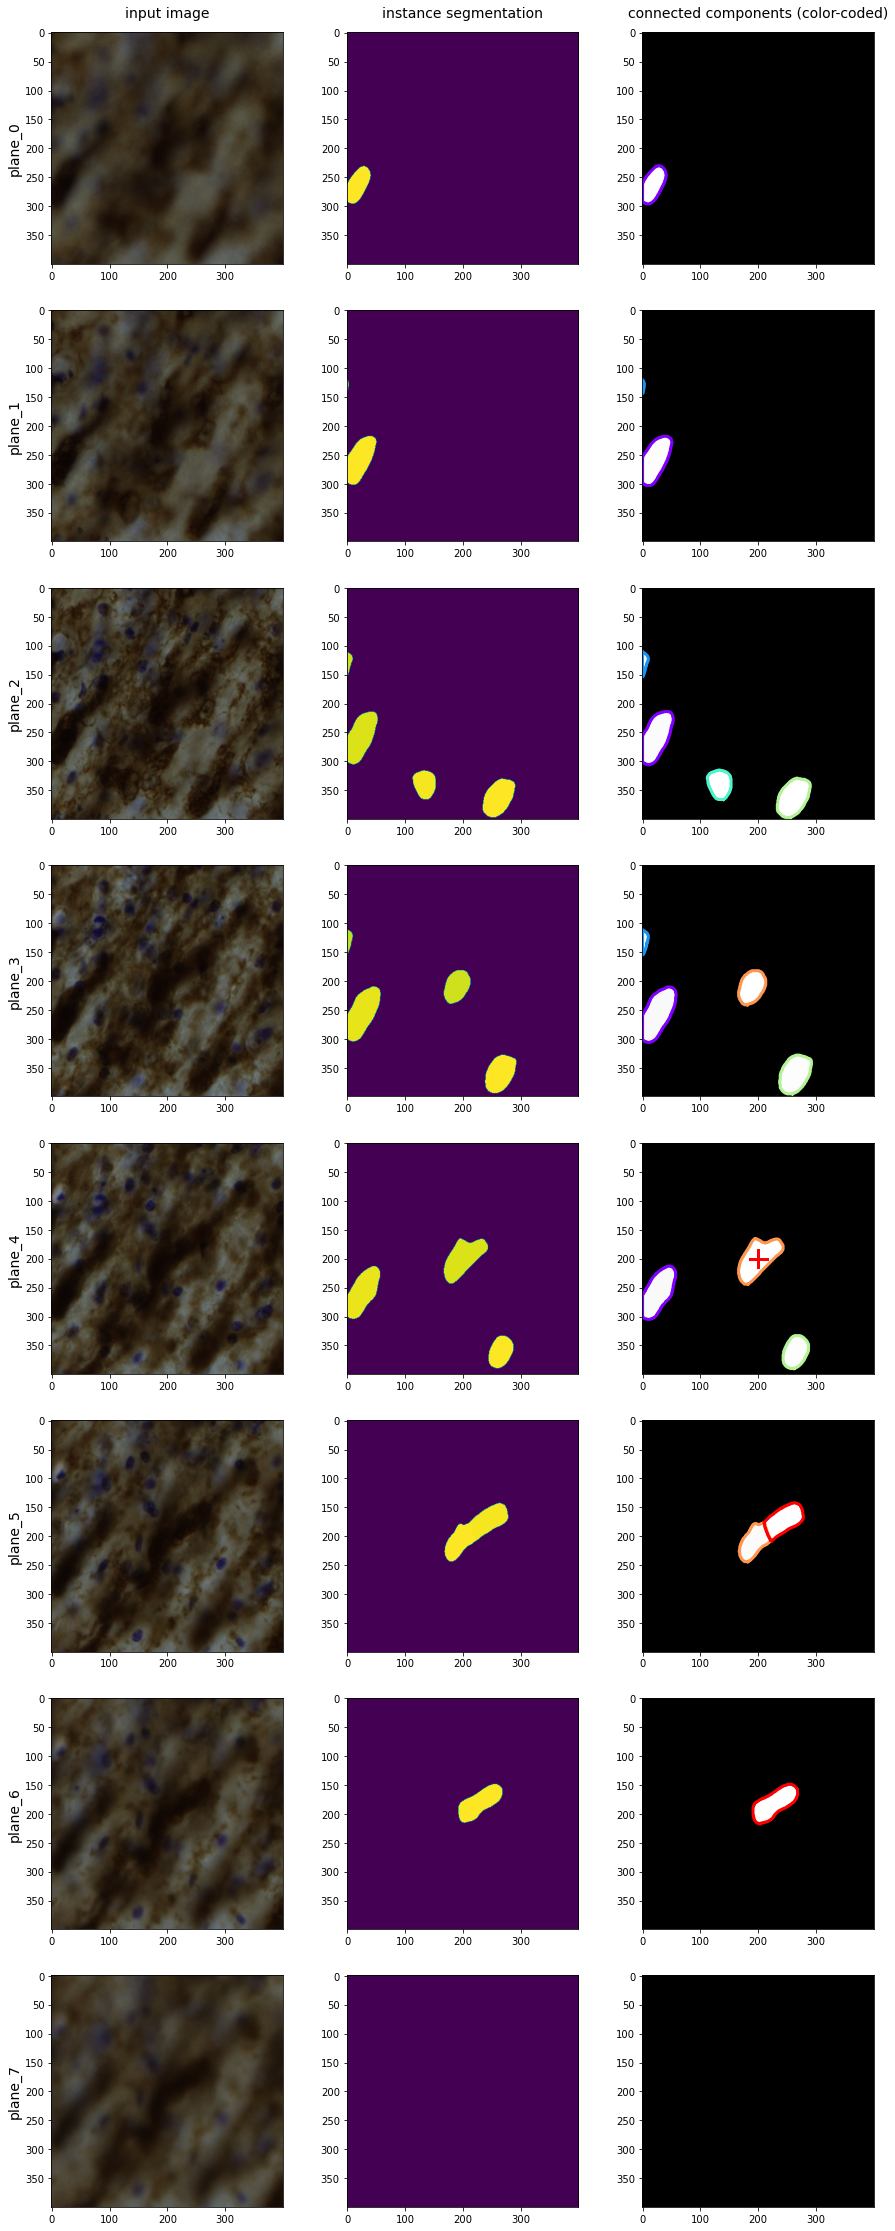

In [23]:
inspect_reconstructed_cells(4, 91, save=False, show=True)

# Confirm that there are no label_ids in results with no final label id assigned!!